<h1>"Predicting NYC Yellow Taxi Fare Amounts with Linear Regression: A Machine Learning Project Using June 2023 Trip Records"</h1>
<h2>In this machine learning project, I used linear regression to predict the fare amount of New York City taxi rides. The project utilized a large dataset of taxi rides and features such as passenger count, trip distance, and pickup/dropoff locations to train the model. The project also involved data cleaning, feature engineering, and visualization.<h2>

<div align="center"> <img src="nyctaxi.jpg" width="500" /></div>

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
#importing the dataset
df = pd.read_parquet('yellow_tripdata_2023-06.parquet', engine='pyarrow')

<h1>Getting some information about the dataset:</h1>
<h3> The dataset cointains 3307234 rows of data.</h3>

In [3]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1.0,3.40,1.0,N,140,238,1,21.90,3.50,0.5,6.70,0.00,1.0,33.60,2.5,0.00
1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,0.0,3.40,1.0,N,50,151,1,15.60,3.50,0.5,3.00,0.00,1.0,23.60,2.5,0.00
2,1,2023-06-01 00:48:24,2023-06-01 01:07:07,1.0,10.20,1.0,N,138,97,1,40.80,7.75,0.5,10.00,0.00,1.0,60.05,0.0,1.75
3,2,2023-06-01 00:54:03,2023-06-01 01:17:29,3.0,9.83,1.0,N,100,244,1,39.40,1.00,0.5,8.88,0.00,1.0,53.28,2.5,0.00
4,2,2023-06-01 00:18:44,2023-06-01 00:27:18,1.0,1.17,1.0,N,137,234,1,9.30,1.00,0.5,0.72,0.00,1.0,15.02,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307229,2,2023-06-30 23:30:21,2023-07-01 00:00:46,NaN,9.20,NaN,None,42,148,0,38.53,0.00,0.5,8.51,0.00,1.0,51.04,NaN,NaN
3307230,1,2023-06-30 23:34:22,2023-07-01 00:32:59,NaN,20.20,NaN,None,132,74,0,70.00,1.75,0.5,11.97,6.55,1.0,91.77,NaN,NaN
3307231,2,2023-06-30 23:45:00,2023-07-01 00:10:00,NaN,6.16,NaN,None,256,140,0,28.03,0.00,0.5,6.41,0.00,1.0,38.44,NaN,NaN
3307232,2,2023-06-30 23:13:38,2023-06-30 23:51:19,NaN,11.65,NaN,None,91,246,0,45.74,0.00,0.5,0.00,6.55,1.0,56.29,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307234 entries, 0 to 3307233
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [5]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3.307234e+06,3307234,3307234,3.207347e+06,3.307234e+06,3.207347e+06,3.307234e+06,3.307234e+06,3.307234e+06,3.307234e+06,3.307234e+06,3.307234e+06,3.307234e+06,3.307234e+06,3.307234e+06,3.307234e+06,3.207347e+06,3.207347e+06
mean,1.737262e+00,2023-06-15 18:09:27.394469,2023-06-15 18:27:09.958314,1.369012e+00,4.368790e+00,1.547159e+00,1.649028e+02,1.638013e+02,1.187126e+00,1.998804e+01,1.620755e+00,4.859043e-01,3.594915e+00,6.065670e-01,9.805643e-01,2.906873e+01,2.262730e+00,1.534284e-01
min,1.000000e+00,2002-12-31 23:03:19,2002-12-31 23:06:17,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-7.500000e+02,-7.500000e+00,-5.000000e-01,-9.500000e+01,-7.255000e+01,-1.000000e+00,-7.510000e+02,-2.500000e+00,-1.750000e+00
25%,1.000000e+00,2023-06-08 09:12:42.250000,2023-06-08 09:30:06.250000,1.000000e+00,1.080000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-06-15 14:15:24.500000,2023-06-15 14:36:09,1.000000e+00,1.820000e+00,1.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.860000e+00,0.000000e+00,1.000000e+00,2.130000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-06-23 02:25:20,2023-06-23 02:40:05.750000,1.000000e+00,3.540000e+00,1.000000e+00,2.330000e+02,2.340000e+02,1.000000e+00,2.260000e+01,2.500000e+00,5.000000e-01,4.480000e+00,0.000000e+00,1.000000e+00,3.130000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2023-07-01 00:42:13,2023-07-03 16:31:24,9.000000e+00,1.852505e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,3.869836e+05,1.425000e+01,5.750000e+00,7.118800e+02,6.655600e+02,1.000000e+00,3.869876e+05,2.500000e+00,1.750000e+00
std,4.477026e-01,NaN,NaN,8.959539e-01,2.280398e+02,6.762597e+00,6.404389e+01,7.005873e+01,5.478269e-01,2.136687e+02,1.869549e+00,1.068704e-01,4.203569e+00,2.252982e+00,1.941525e-01,2.141569e+02,7.960739e-01,5.027511e-01


<h1>Data Cleaning: </h1>

In [6]:
#check for duplicates
df.duplicated().any()

False

In [7]:
#check for null values
df.isnull().any()

VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count           True
trip_distance            False
RatecodeID                True
store_and_fwd_flag        True
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge      True
Airport_fee               True
dtype: bool

In [8]:
#This dataset has more than 3 millions of data, and only 5 columns have 99887 null values, so I decided to remove them.
null_counts = df.isnull().sum()
null_counts

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          99887
trip_distance                0
RatecodeID               99887
store_and_fwd_flag       99887
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     99887
Airport_fee              99887
dtype: int64

In [9]:
#removing the null values
df = df.dropna()

In [10]:
#removing irrelevant columns
df = df.drop(['VendorID', 'store_and_fwd_flag'], axis=1)

<h1>Feature Engineering: </h1>

<h3>Euclidean distance and Manhattan distance are two common distance metrics used in machine learning and data analysis to measure the distance between two points in a multi-dimensional space.</h3>
<h3>Euclidean distance: Euclidean distance is the straight-line distance between two points in a multi-dimensional space. It is calculated as the square root of the sum of the squared differences between the corresponding coordinates of the two points. In other words, it is the length of the shortest path between two points in a straight line. Euclidean distance is also known as L2 distance or Euclidean norm.</h3>
<h3>Manhattan distance: Manhattan distance is the distance between two points measured along the axes at right angles. It is calculated as the sum of the absolute differences between the corresponding coordinates of the two points. In other words, it is the distance between two points measured along the edges of a rectangle. Manhattan distance is also known as L1 distance, taxicab distance, or city block distance.</h3>

In [11]:
#Calculating Euclidean distance
df['euclidean_distance'] = np.sqrt((df['PULocationID'] - df['DOLocationID'])**2)

#Calculating Manhattan distance
df['manhattan_distance'] = abs(df['PULocationID'] - df['DOLocationID'])

<h1>Outliers:</h1>

<h3>The fare amount can't be negative!</h3>

In [12]:
df.fare_amount.describe()

count    3.207347e+06
mean     1.986512e+01
std      2.169519e+02
min     -7.500000e+02
25%      9.300000e+00
50%      1.350000e+01
75%      2.190000e+01
max      3.869836e+05
Name: fare_amount, dtype: float64

In [13]:
# Drop fare_amount less than 0.
neg_fare = df.loc[df.fare_amount<0, :].index
df.drop(neg_fare, axis = 0, inplace = True)

<h3> According to a website called Introducing New York, , the base fare for a taxi ride in New York City is . so I'm going to remove fare amount less than 3 dollars., </h3></h3>

In [14]:
#Drop rows lesser than 2.5
fares_to_drop = df.loc[(df.fare_amount<2.5), :].index
df.drop(fares_to_drop, axis = 0, inplace = True)

<h3>Based on Takewalks website, the maximum amount of passengers allowed in a standard taxicab by law is four. When the backseat is crowded, one passenger is permitted to sit beside the driver.</h3>

In [15]:
df.passenger_count.describe()

count    3.175120e+06
mean     1.369117e+00
std      8.970927e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

In [16]:
#Drop passengers more than 4
passengers_to_drop = df.loc[(df.passenger_count>4), :].index
df.drop(passengers_to_drop, axis = 0, inplace = True)

<h1>Data Visualization</h1>

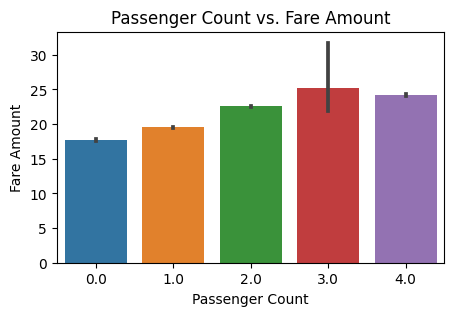

In [17]:
# Create the bar plot using barplot from Seaborn
plt.figure(figsize=(5, 3))

sns.barplot(data=df, x='passenger_count', y='fare_amount')

plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.title('Passenger Count vs. Fare Amount')

plt.show()

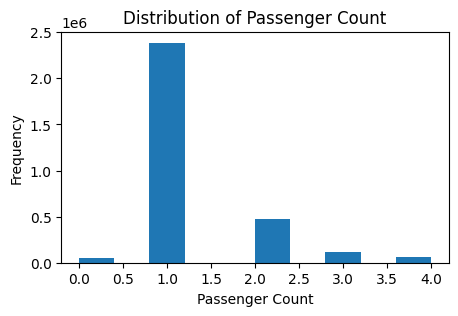

In [18]:
# Histogram for passenger_count
plt.style.use('default')

plt.figure(figsize=(5, 3))

plt.hist(df['passenger_count'], bins=10)
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Count')

plt.show()

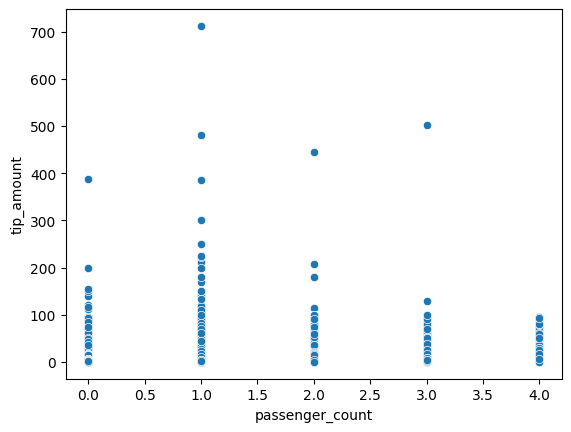

<Figure size 300x200 with 0 Axes>

In [19]:
# Scatter plot for passenger_count vs. tip_amount
sns.scatterplot(data=df, x='passenger_count', y='tip_amount')

plt.figure(figsize=(3, 2))

plt.show()

<h1>Train The Model </h1>

<h3>Using linear regression to predict the fare amount of a yellow taxi ride based on the input features such as pickup and dropoff locations, passenger count, and trip distance:</h3>

In [20]:
#Selecting the relevant columns
X = ['PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance','euclidean_distance','manhattan_distance']
y = 'fare_amount'

In [21]:
#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.2, random_state=42)

In [22]:
#Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
#Making predictions on the test set
y_pred = model.predict(X_test)

<h1>Evaluate the model:</h1>

<h3>Mean Squared Error (MSE) measures the average squared difference between the predicted and actual values of the target variable. A lower MSE indicates better performance.</h3>
<h3>Root Mean Squared Error (RMSE) is the square root of the MSE and measures the average difference between the predicted and actual values of the target variable. A lower RMSE indicates better performance.</h3>
<h3>R-squared (R2) measures the proportion of variance in the target variable that is explained by the model. R2 values range from 0 to 1, with higher values indicating better fit.</h3>

In [24]:
#Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 347.06539126345234


In [25]:
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 18.62969112098889


In [26]:
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

R2: 0.04188521972231862


<h3>Based on these metrics, the model has an MSE of 347.06 and an RMSE of 18.62, which suggests that the model's predictions have a relatively high error rate. Additionally, the R2 value of 0.041 indicates that the model explains only a small proportion of the variance in the target variable.</h3>